In [3]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

from src.globals import *

In [4]:
df_imu = pd.read_parquet(path_imu_results)
df_motor = pd.read_parquet(path_motor_results)
df_series = pd.read_parquet(path_series_results)

In [5]:
cols = [f'lof_{x}' for x in imu_sensors + ['acc_gyro']]
rpc_dict = { colname : precision_recall_curve(df_series['anomaly'] != "none", df_series[colname]) for colname in cols}

In [12]:
def plot_curves(rpcdict, title="", colnums=3):
    # Calculate the number of rows needed
    cols = colnums
    num_plots = len(rpcdict)
    rows = (num_plots + cols - 1) // cols  # Ceiling division to ensure enough rows

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))

    # Flatten axes for easy indexing if needed
    axes = axes.flatten()


    # Loop through the DataFrames and plot each in the corresponding subplot
    for i, (name, (precision, recall, thresholds)) in enumerate(rpcdict.items()):
        axes[i].plot(thresholds, precision[:-1], label="precision")
        axes[i].plot(thresholds, recall[:-1], label="recall")
        axes[i].legend()
        axes[i].set_title(name)
        #axes[i].set_xlim(0, 1)
        axes[i].set_ylim(0, 1) 
        #axes[i].axis('scaled')

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(title)
    plt.tight_layout()

    # Show the plot
    plt.show()

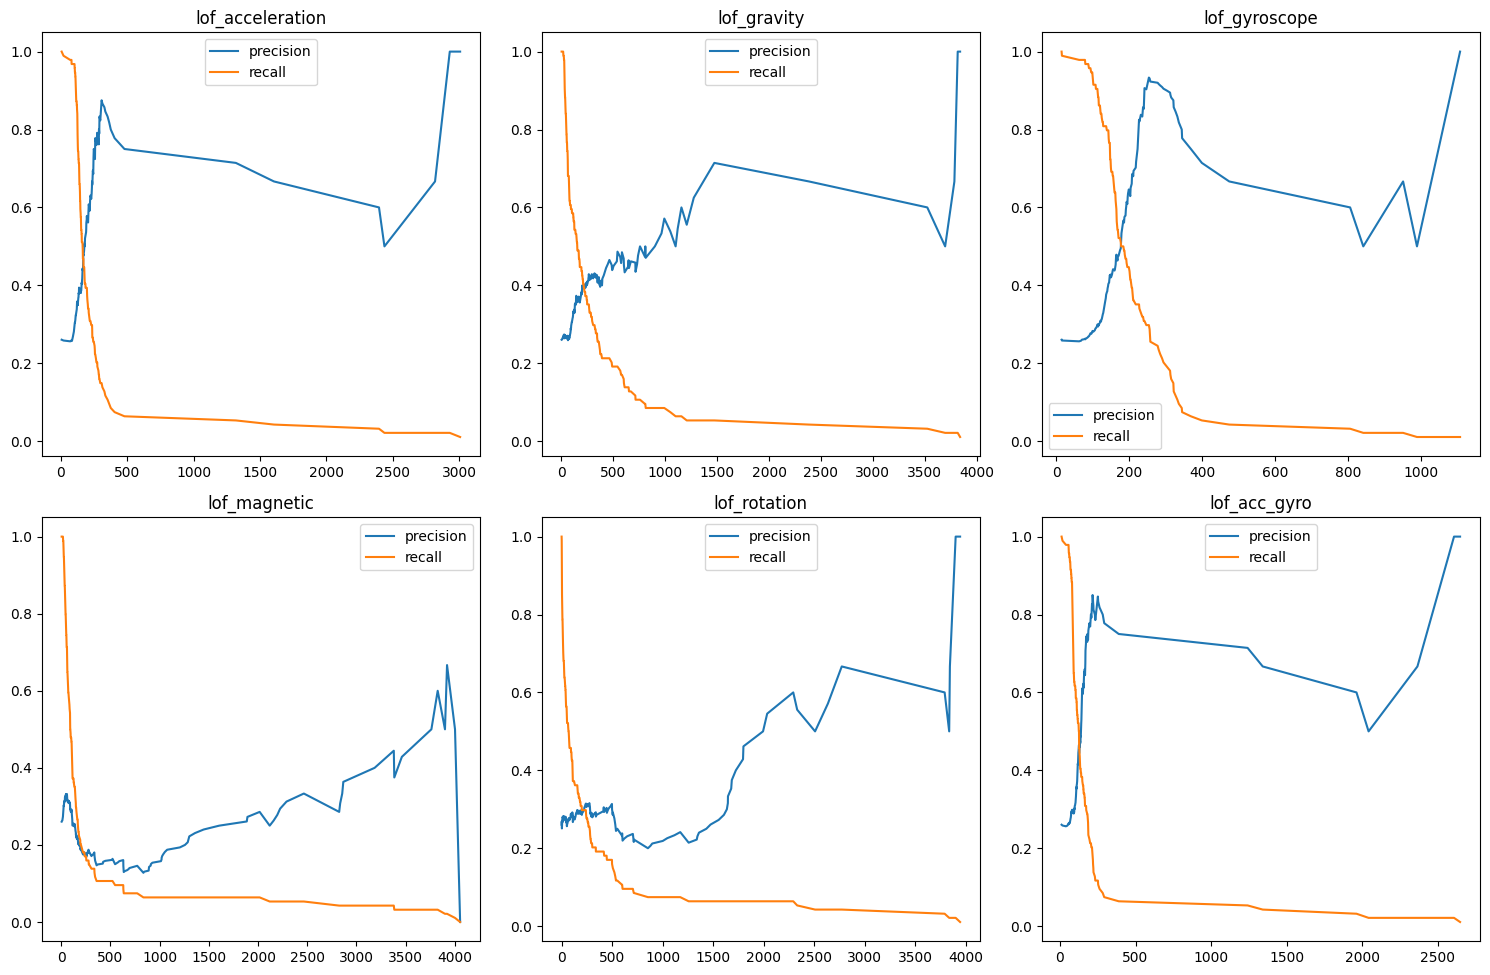

In [11]:
plot_curves(rpc_dict)

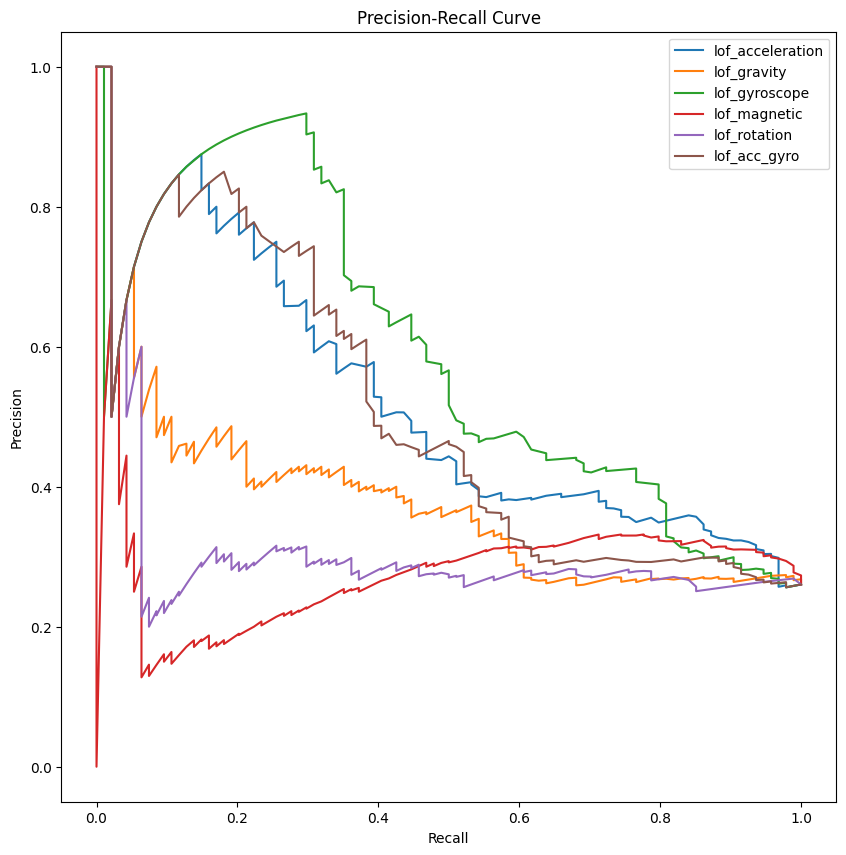

In [52]:
plt.figure(figsize=(10, 10))

# Plotting the Precision-Recall curve
for (name, (precision, recall, _)) in rpc_dict.items():
    plt.plot(recall, precision, label=name)

# Add labels and title
plt.legend()
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Display the plot
plt.show()


[   7   21   71   78   80   81   82   85   86   87   88   89   90   91
   92   93   94   95   96   97   98   99  100  101  102  103  104  105
  106  107  108  109  110  111  112  113  114  115  116  117  118  119
  120  121  122  123  125  126  127  128  129  130  132  133  134  135
  136  137  138  139  140  141  143  144  145  146  147  148  150  151
  152  153  154  155  156  157  158  159  160  161  162  163  164  165
  166  167  168  169  170  171  172  176  177  178  179  181  182  183
  186  187  191  192  193  196  197  198  199  201  204  206  207  208
  209  210  211  215  219  220  221  224  230  233  235  236  237  238
  242  245  247  249  255  257  258  259  260  265  269  275  276  284
  287  288  290  292  298  308  314  329  336  353  365  377  406  480
 1319 1606 2397 2438 2819 2930 3008] 161 162


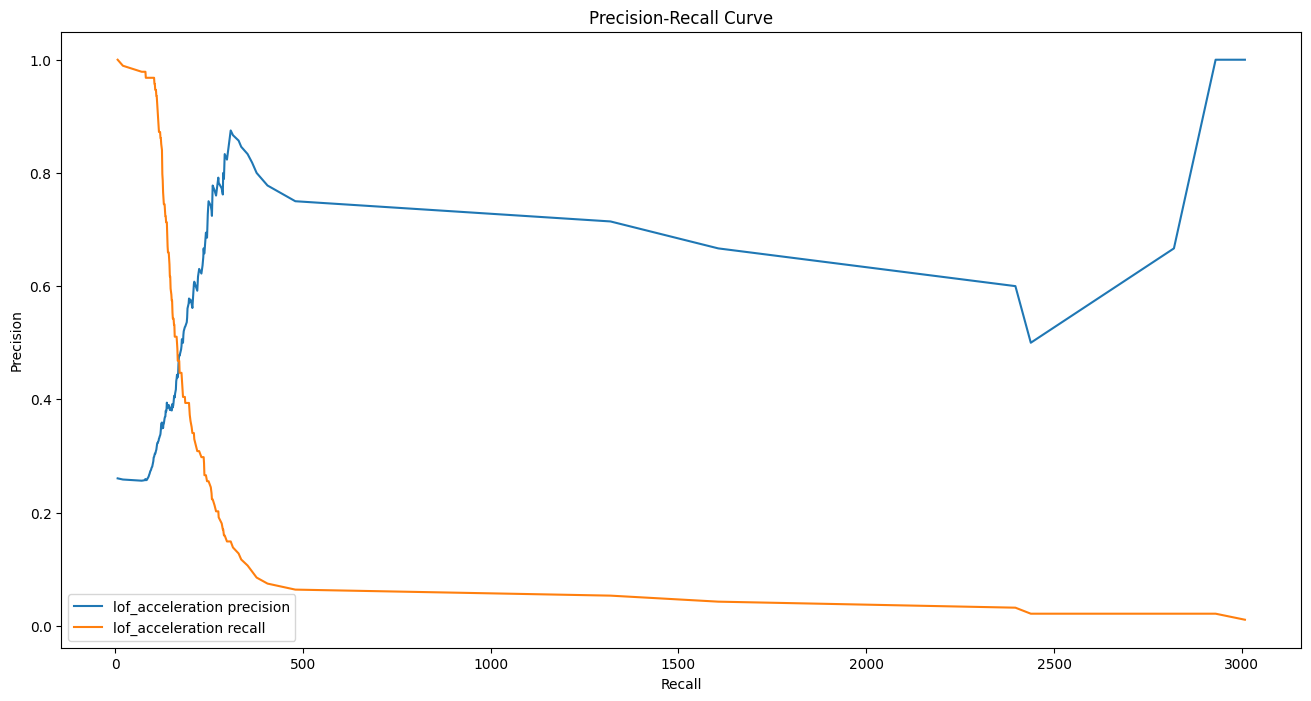

In [64]:
plt.figure(figsize=(16, 8))

(name, (precision, recall, thresholds)) = list(rpc_dict.items())[0]
print(thresholds, len(thresholds), len(precision))

# Plotting the Precision-Recall curve
plt.plot(thresholds, precision[:-1], label=name + " precision")
plt.plot(thresholds, recall[:-1], label=name + " recall")
#plt.plot(precision[:-1], thresholds, label=name)

# Add labels and title
plt.legend()
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Display the plot
plt.show()
